In [68]:

# Importing the required packages 
import numpy as np 
import pandas as pd 
import sklearn
from sklearn.metrics import confusion_matrix 
#from sklearn.cross_validation import train_test_split 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn import tree


In [69]:
sklearn.__version__

'0.22'

In [70]:

# Function importing Dataset 

balance_data = pd.read_csv( 
'https://archive.ics.uci.edu/ml/machine-learning-'+
'databases/balance-scale/balance-scale.data', 
sep= ',', header = None) 





In [71]:
balance_data.columns = ['Y', '1', '2', '3', '4']
balance_data = balance_data[balance_data['Y'] != 'L']

In [72]:
# Printing the datasset shape 
print ("Dataset Length: ", len(balance_data)) 
print ("Dataset Shape: ", balance_data.shape) 

# Printing the dataset obseravtions 
print ("Dataset: ",balance_data.head()) 

Dataset Length:  337
Dataset Shape:  (337, 5)
Dataset:     Y  1  2  3  4
0  B  1  1  1  1
1  R  1  1  1  2
2  R  1  1  1  3
3  R  1  1  1  4
4  R  1  1  1  5


In [73]:
balance_data.head(10)

,Y,1,2,3,4
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5
5,R,1,1,2,1
6,R,1,1,2,2
7,R,1,1,2,3
8,R,1,1,2,4
9,R,1,1,2,5


In [34]:
balance_data.head(20)

,Y,1,2,3,4
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5
5,R,1,1,2,1
6,R,1,1,2,2
7,R,1,1,2,3
8,R,1,1,2,4
9,R,1,1,2,5


In [12]:
#balance_data.values[:, 0]

In [74]:
balance_data['Y'].unique()

array(['B', 'R'], dtype=object)

In [49]:
balance_data.describe(include = object)

,Y
count,337
unique,2
top,R
freq,288


In [52]:
balance_data.groupby(['Y']).agg(['count'])

,1,2,3,4
,count,count,count,count
Y,,,,
B,49,49,49,49
R,288,288,288,288


In [75]:

# Function to split the dataset 


# Separating the target variable 
X = balance_data.values[:, 1:5] 
Y = balance_data.values[:, 0] 

# Splitting the dataset into train and test 
X_train, X_test, y_train, y_test = train_test_split( 
X, Y, test_size = 0.3, random_state = 100) 



In [76]:
    
# Function to perform training with giniIndex. 


# Creating the classifier object 
clf_gini = DecisionTreeClassifier(criterion = "gini", 
    random_state = 100,max_depth=3, min_samples_leaf=5) 

# clf_gini = DecisionTreeClassifier(criterion = "entropy", 
#     random_state = 100,max_depth=3, min_samples_leaf=5)

# Performing training 
clf_gini.fit(X_train, y_train) 



DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [77]:
clf_gini

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

[Text(170.9,196.385,'X[2] <= 2.5\ngini = 0.259\nsamples = 235\nvalue = [36, 199]'),
 Text(85.45,140.275,'X[3] <= 2.5\ngini = 0.417\nsamples = 64\nvalue = [19, 45]'),
 Text(42.725,84.165,'X[0] <= 1.5\ngini = 0.486\nsamples = 12\nvalue = [7, 5]'),
 Text(21.3625,28.055,'gini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(64.0875,28.055,'gini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(128.175,84.165,'X[0] <= 2.5\ngini = 0.355\nsamples = 52\nvalue = [12, 40]'),
 Text(106.812,28.055,'gini = 0.278\nsamples = 36\nvalue = [6, 30]'),
 Text(149.537,28.055,'gini = 0.469\nsamples = 16\nvalue = [6, 10]'),
 Text(256.35,140.275,'X[1] <= 2.5\ngini = 0.179\nsamples = 171\nvalue = [17, 154]'),
 Text(213.625,84.165,'X[3] <= 2.5\ngini = 0.084\nsamples = 91\nvalue = [4, 87]'),
 Text(192.263,28.055,'gini = 0.208\nsamples = 34\nvalue = [4, 30]'),
 Text(234.988,28.055,'gini = 0.0\nsamples = 57\nvalue = [0, 57]'),
 Text(299.075,84.165,'X[0] <= 4.5\ngini = 0.272\nsamples = 80\nvalue = [13, 67]'),
 Text(277.713,2

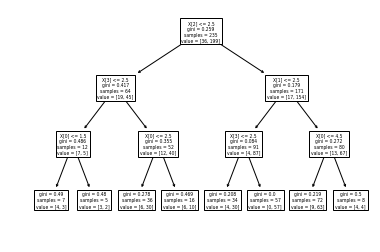

In [78]:
from matplotlib import pyplot as plt
tree.plot_tree(clf_gini)


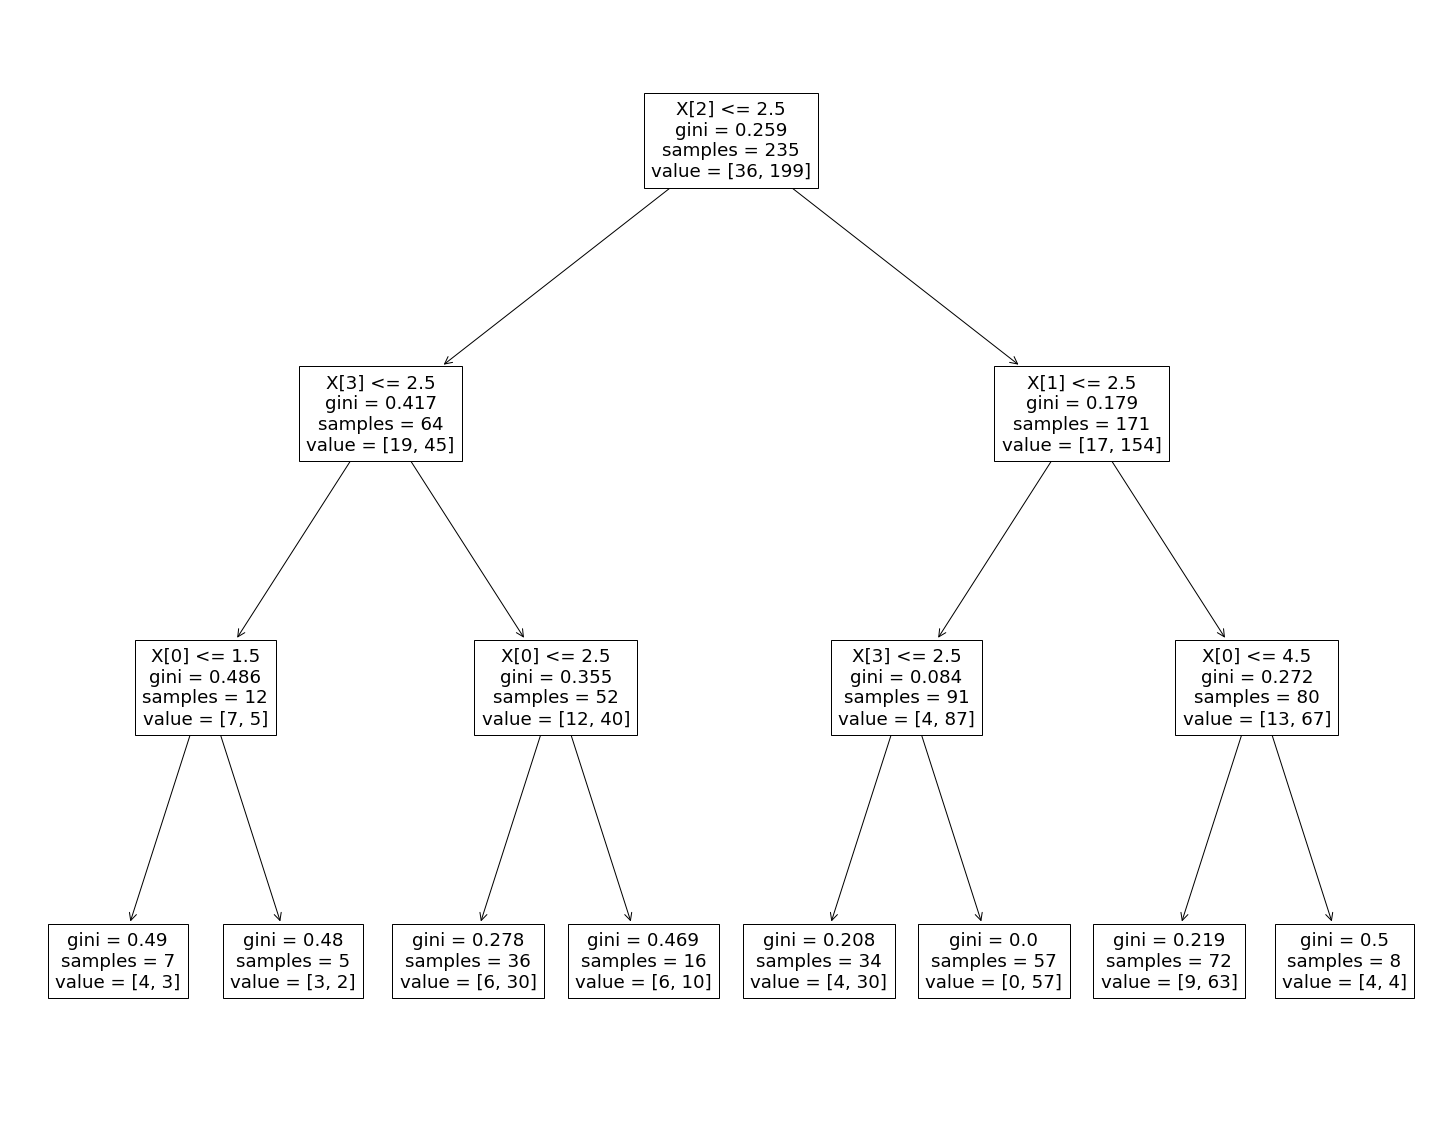

In [79]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf_gini)

In [58]:
    
# Function to perform training with entropy. 


# Decision tree with entropy 
clf_entropy = DecisionTreeClassifier( 
        criterion = "entropy", random_state = 100, 
        max_depth = 3, min_samples_leaf = 5) 

# Performing training 
clf_entropy.fit(X_train, y_train) 




DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [80]:

# Function to make predictions 


# Predicton on test with giniIndex 
y_pred = clf_gini.predict(X_test) 
print("Predicted values:") 
print(y_pred) 



Predicted values:
['R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'B' 'R' 'R'
 'B' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'B' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'B' 'R' 'R' 'R' 'R' 'B' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R']


In [60]:

# Predicton on test with giniIndex 
y_pred = clf_entropy.predict(X_test) 
print("Predicted values:") 
print(y_pred) 

Predicted values:
['R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'B' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'B' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'B' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R']


In [81]:
    
# Function to calculate accuracy 


print("Confusion Matrix: ", 
    confusion_matrix(y_test, y_pred)) 



# print("Report : ", 
# classification_report(y_test, y_pred)) 


Confusion Matrix:  [[ 2 11]
 [ 3 86]]


In [82]:
print ("Accuracy : ", 
accuracy_score(y_test,y_pred)*100) 

Accuracy :  86.27450980392157


In [ ]:
# (2*Precision*recall)/(precision + recall)

In [ ]:
# TP/(TP + 0.5(FP + FN))